# 2022年总结：迷途知返

### 两瓣苦瓜

如果将2022掰开两半，那一半是苦瓜，另一半也是苦瓜。这不是在模仿鲁迅，也并非在讲段子。只是这两块苦瓜各有各的苦，也各有各的回甘。

前半年转身成为数据产品经理，但不擅长规划且热爱技术的人，总忍不住下手去解决各种各样的技术问题。所谓“get your hands dirty”，我想：“my hands are always dirty”。年中Jack哥问道：为什么你总有那么多热情去研究这些东西？我说：“忍不住，没法忍。”我寻觅心中执念，大概是这么两条：

- 重复到第三次的工作，就要考虑如何自动化，要剥削机器，而非人类；
- 重复到第三次的自动化，就要考虑如何工具化或产品化，要可复制，可放大。

因此我会偏好开放而非封闭，无论是在学习方向选择和平台工具选型都会如此考虑。比如开源 > 闭源、开放协议 > 封闭生态、多处适用 > 单一平台可用，等等。

技术也具备类似属性，因为**技术是工具的工具**，手上没有好用工具时，你随时可以造一个。

技术转产品并不困难，前提是你要跳出以往的技术视角，尝试站在用户角度考虑问题，并且将这个用户想象成一个什么都不懂的小孩。

也许是因为曾经当老师的经历，产品视角的转化于我而言没有十分困难，再加上ToB产品经理偏重商业分析而非用户体验，有过多年BI项目实施经验也为我加上了BUFF，产品设计过程反倒感到轻松。

那苦在何处？苦在规划，我特别不擅长规划，不擅长构想远期产品终归会长成的那个样子。我秉持着一个“让其自然生长”的观念，觉得只要将眼下问题扎扎实实地解决之后，下一步的构思才能获得充足养分，得以涌现。但这无疑不够快，也不能够给到上面充足的、可对外吹嘘的材料。因此，我还得逼着自己去空想，去规划。

那时，我将《好战略，坏战略》精读完，却又陷入了另一个苦况，用书中知识去套目前的发展态势，发现是战略定得不好，所以团队才会那么累。这样的抵触让我无法专注到手上的工作，而这却是完全没有必要的。我需要的尽可能又快又好地将作品做出来，不管对错，有比无要强。以作品为导向，是我此刻立下的心愿。

****

下半年回归技术经理，然而却跟我想象中互联网公司生态下的技术经理大有不同。

在互联网，技术经理除了负责制定技术路线，解决技术难题，也是得实际上手解决那些无人能解的技术问题的，而目前更多却只是在做“信分变现”。信分变现指的是，当你要去做一份咨询方案时，你会整理大量公开信息，整合为一个设计方案，提交给客户。获得客户首肯之后，则要进一步整理诸如：需求调研材料，软件报价，软件工程初步设计等等一大堆文档工作。

然而少了技术活儿的我怎能活得下去呢，于是我在公司自主发起了几个小型练手项目。分别是：AIS数据采集分析，产出了一个实时更新的数据面板；基于Cesium的片区模型空间分析前端页面；基于Sketchup和3DMax的数据融合技术预研。因为基本上只有一个人在做这方面的技术研究和产出，所以个人对这个成果并没有很满意。我更希望的是，我开个头，然后团队里的小伙伴可以将其做到80分以上。

向内探寻指引自身行动的信条，大概有这么三条：

第一条来自维特根斯坦：凡可说的，皆可说清，不可说的，只可不说。英文原文是：what can be said at all can be said clearly, and what we cannot talk about, we must consign to silence。这跟一个人的语言使用习惯密切相关，阳志平老师也有类似一金句：语言不是思想的外衣，而是思想本身。

第二条来自物理学家费曼：凡我不能创造，皆不能理解。英文原文是：what I cannot create, I do not understand。换句话说，若你希望真正理解一个事物，你不但要将其原原本本地实现出来，还要能创新。什么是理解？理解不是背诵，不是复述，更不是口号，而是创造。

第三条来自黑客与画家：可测量与可放大。这意味着你对事物的评判总是具备可操作性，你的工作成果总是可以复用，或是边际成本递减的。 在这样的理性驱动之下，技术人生才有了可被追求之物。正如语言即工具，技术亦是工具。工具不仅是思想的外在，更是思想本身。人类之所以优于地球上其他物种，正是因为其懂得如何创造工具。

但这样的信条不容易让人感同身受，特别是在公司环境下，你的影响力相对于在外部学习社群，九牛一毛。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 导入数据源文件
file = '/Users/januswing/data/report-10-01-2023.csv'
source = pd.read_csv(file)

# 删除自带统计数据行（To列为空）
stats_line = source[source['To'].isna()].index
source = source.drop(stats_line, axis=0)

# 维度归一化，提取日期，时间单位统一为小时
source.loc[source['Activity type'] == 'Pstudy',['Activity type']] = 'Study'
source.loc[source['Activity type'] == 'Pwork',['Activity type']] = 'Work'
source.loc[source['Activity type'] == 'Pwrite',['Activity type']] = 'Writing'
source['Duration_Min'] = source['Duration'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1])/60 + int(x.split(':')[2])/3600)
source['year'] = source['To'].apply(lambda x: int(x[0:4]))
source['month'] = source['To'].apply(lambda x: int(x[5:7]))
source['day'] = source['To'].apply(lambda x: int(x[8:10]))

In [4]:
source

,Activity type,Duration,From,To,Comment,Tags,Duration_Min,year,month,day
0,Writing,00:36:00,2022-12-31 16:53:13,2022-12-31 17:29:13,NaN,NaN,0.600000,2022,12,31
1,Study,00:13:05,2022-12-31 16:28:34,2022-12-31 16:41:39,NaN,NaN,0.218056,2022,12,31
2,plan,00:40:55,2022-12-31 15:37:34,2022-12-31 16:18:29,NaN,NaN,0.681944,2022,12,31
3,plan,00:35:44,2022-12-31 14:50:50,2022-12-31 15:26:34,NaN,NaN,0.595556,2022,12,31
4,life,00:00:12,2022-12-31 10:34:28,2022-12-31 10:34:40,NaN,NaN,0.003333,2022,12,31
...,...,...,...,...,...,...,...,...,...,...
2936,Read,00:20:49,2022-07-01 07:53:21,2022-07-01 08:14:10,NaN,NaN,0.346944,2022,7,1
2937,life,00:40:18,2022-07-01 07:13:03,2022-07-01 07:53:21,NaN,NaN,0.671667,2022,7,1
2938,Study,00:36:03,2022-07-01 06:37:00,2022-07-01 07:13:03,NaN,NaN,0.600833,2022,7,1
2939,social,00:00:07,2022-07-01 06:36:53,2022-07-01 06:37:00,NaN,NaN,0.001944,2022,7,1


   Activity type  Duration_Min
3           Work   1049.875833
7           life    433.391667
2          Study    147.032778
5         family    114.260833
1           Read     71.852778
6            fun     42.180833
4        Writing     33.826389
0         Coding     20.557778
8           plan     19.500000
10        sports     17.106111
9         social     11.556667


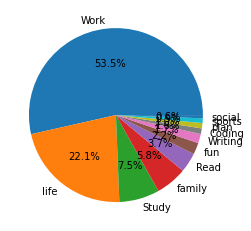

In [5]:
# 分类统计情况
all_type_sum = source.groupby(['Activity type'])['Duration_Min'].sum().reset_index()
all_type_sum = all_type_sum.sort_values(by="Duration_Min",ascending=False)
print(all_type_sum)
labels = tuple(all_type_sum['Activity type'].drop_duplicates())
sizes = list(all_type_sum['Duration_Min'])
plt.pie(sizes,labels = labels,autopct = '%1.1f%%')
plt.show()

   month  Duration_Min
0      7    169.909722
1      8    205.263333
2      9    191.866111
3     10    174.454722
4     11    167.980278
5     12    140.401667


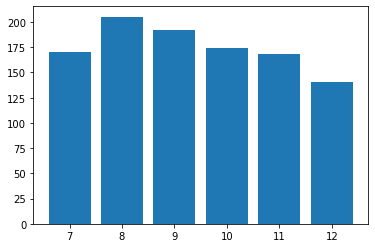

In [6]:
# 大类分月统计
work_monthly_sum = source[source['Activity type'] ==  'Work']
work_monthly_sum = work_monthly_sum.groupby(['month'])['Duration_Min'].sum().reset_index()
print(work_monthly_sum)
plt.bar(list(work_monthly_sum['month']),work_monthly_sum['Duration_Min'])
plt.show()

In [7]:
# 平均每天工作时间
daily_work_sum = source[source['Activity type'] ==  'Work']
daily_work_sum = daily_work_sum.groupby(['month','day'])['Duration_Min'].sum().reset_index()
print('平均每天工作时间：{}小时'.format(daily_work_sum['Duration_Min'].mean()))
print('每天工作时间中位数：{}小时'.format(daily_work_sum['Duration_Min'].quantile()))

平均每天工作时间：6.175740196078431小时
每天工作时间中位数：7.082777777777778小时


相对于上半年每天工作6.23小时，下降到6.18小时，变化不大，但能感觉到下半年的技术成长力度是有所减弱。

2023年，我的人生发展重点是什么？权重发布如何？又何以在不断变化的工作和生活中，保持那份有力量的输出？这些是我在第一季度需要解决的问题。

为启用“承诺一致性”的BUFF，我也在此写下第一季度的三个重点目标以及初步分解：

1. 信息检索与分析系统培训
以此机会完善
- 信息检索与分析工具集：完善现有工具组合使用，完善各种场景工作流自动化
- 可审计文档撰写系统雏形
- 企业级情报分析系统构建

2. 孩子写作训练的体系化思考
- 菲菲写作课学习并输出笔记
- 家庭日常读书计划制定

3. 三维技能入门
- WebGL理论知识学习
- Three.js学习
- 学习并熟练一个三维工具，选一（Unity，3DMax，Blender）

此外几个积累下来的、很想完成的事儿，期望也在第一季度完成：

- 数据库论文研读一篇（碎石者大佬那篇）
- 决策分析课程学习并完成所有作业
- 知识星球日常运营